In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import h5py, os

import powerbox as pbox

In [2]:
import utils.pluto_utils as pluto
from utils.visualise import *

In [3]:
from Kea.Kea.statistics.spectra.per_spectra import modal_spectrum

# output_dir

In [4]:
output_dir = "/home/yangelaxue/Documents/VUW/pluto_runs/Orszag_Tang/"

# Save plots and movies

In [5]:
save_dir = os.path.join(output_dir,"visualisation")

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# Load Data

In [6]:
f_names = pluto.get_HDF5names(output_dir)
f_names

['data.0000.dbl.h5',
 'data.0001.dbl.h5',
 'data.0002.dbl.h5',
 'data.0003.dbl.h5',
 'data.0004.dbl.h5',
 'data.0005.dbl.h5',
 'data.0006.dbl.h5',
 'data.0007.dbl.h5',
 'data.0008.dbl.h5',
 'data.0009.dbl.h5',
 'data.0010.dbl.h5',
 'data.0011.dbl.h5',
 'data.0012.dbl.h5',
 'data.0013.dbl.h5',
 'data.0014.dbl.h5',
 'data.0015.dbl.h5',
 'data.0016.dbl.h5',
 'data.0017.dbl.h5',
 'data.0018.dbl.h5',
 'data.0019.dbl.h5',
 'data.0020.dbl.h5',
 'data.0021.dbl.h5',
 'data.0022.dbl.h5',
 'data.0023.dbl.h5',
 'data.0024.dbl.h5',
 'data.0025.dbl.h5',
 'data.0026.dbl.h5',
 'data.0027.dbl.h5',
 'data.0028.dbl.h5',
 'data.0029.dbl.h5',
 'data.0030.dbl.h5',
 'data.0031.dbl.h5',
 'data.0032.dbl.h5',
 'data.0033.dbl.h5',
 'data.0034.dbl.h5',
 'data.0035.dbl.h5',
 'data.0036.dbl.h5',
 'data.0037.dbl.h5',
 'data.0038.dbl.h5',
 'data.0039.dbl.h5',
 'data.0040.dbl.h5',
 'data.0041.dbl.h5',
 'data.0042.dbl.h5',
 'data.0043.dbl.h5',
 'data.0044.dbl.h5',
 'data.0045.dbl.h5',
 'data.0046.dbl.h5',
 'data.0047.d

In [7]:
X, Y, Z = pluto.load_HDF5data(os.path.join(output_dir,f_names[0]), 'X', 'Y', 'Z')

In [8]:
rho_list = [pluto.load_HDF5data(os.path.join(output_dir,f_name), 'rho')[0] for f_name in f_names]
prs_list = [pluto.load_HDF5data(os.path.join(output_dir,f_name), 'prs')[0] for f_name in f_names]
vx1_list = [pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx1')[0] for f_name in f_names]
vx2_list = [pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx2')[0] for f_name in f_names]
vx3_list = [pluto.load_HDF5data(os.path.join(output_dir,f_name), 'vx3')[0] for f_name in f_names]

In [9]:
v_list = [(vx1**2 + vx2**2 + vx3**2)**.5 for vx1,vx2,vx3 in zip(vx1_list,vx2_list,vx3_list)]

In [10]:
times = pluto.get_times(output_dir)

# Plots

In [11]:
def get_list2D(var_list):
    return [_var[0] for _var in var_list] if var_list[0].ndim==3 else var_list

In [12]:
XY = (X[0],Y[0]) if X.ndim==3 else (X,Y)

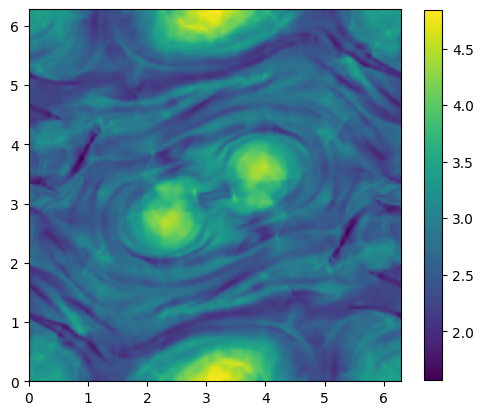

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

# im = ax.pcolormesh(X[0],Y[0],np.log(rho_list[0][:,:,96//2]))

im = ax.pcolormesh(X,Y,rho_list[-1])

fig.colorbar(im,shrink=.8)


# Animate Plots

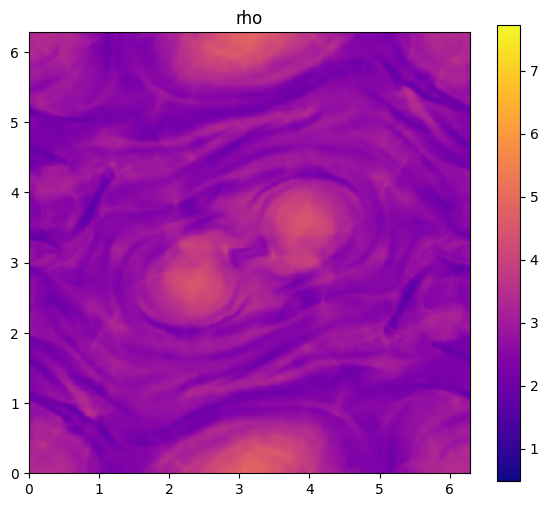

In [30]:
_rho_list = get_list2D(rho_list)
vmin, vmax = np.min(_rho_list), np.max(_rho_list)

animate_vars(_rho_list,save_dir=os.path.join(save_dir,'rho.mp4'),title='rho',
             XY=(X,Y),
             vmin=vmin,vmax=vmax
            )

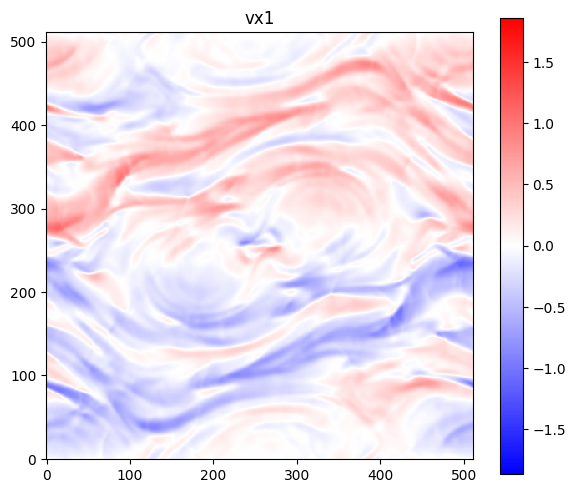

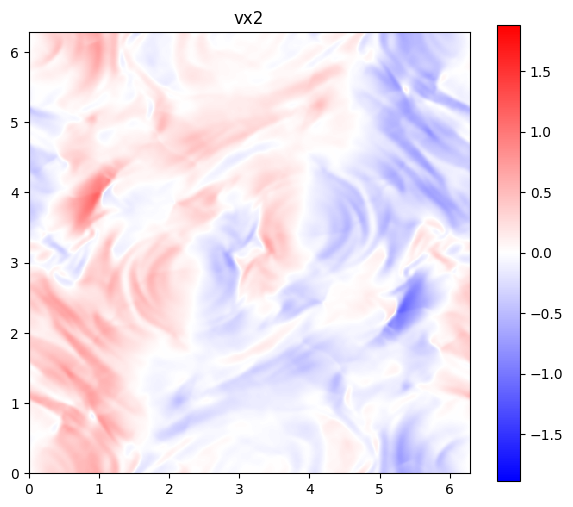

In [31]:
_vx1_list = get_list2D(vx1_list)
_vminmax = np.max((np.abs(np.min(_vx1_list)), np.max(_vx1_list)))
animate_vars(_vx1_list,cmap="bwr",save_dir=os.path.join(save_dir,'vx1.mp4'),title='vx1',
             vmin=-_vminmax,vmax=_vminmax
            )

_vx2_list = get_list2D(vx2_list)
_vminmax = np.max((np.abs(np.min(_vx2_list)), np.max(_vx2_list)))
animate_vars(_vx2_list,cmap="bwr",save_dir=os.path.join(save_dir,'vx2.mp4'),title='vx2',
             XY=(X,Y),
             vmin=-_vminmax,vmax=_vminmax,
            )

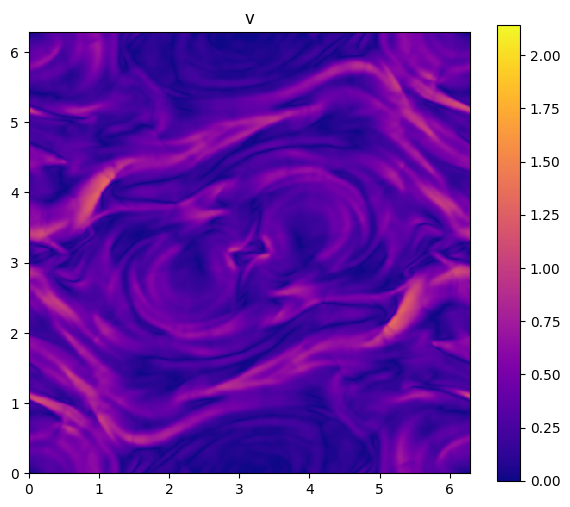

In [13]:
_v_list = get_list2D(v_list)
animate_vars(_v_list,save_dir=os.path.join(save_dir,'v.mp4'),title='v',
             XY=(X,Y),
             vmin=0,vmax=np.max(_v_list)
            )

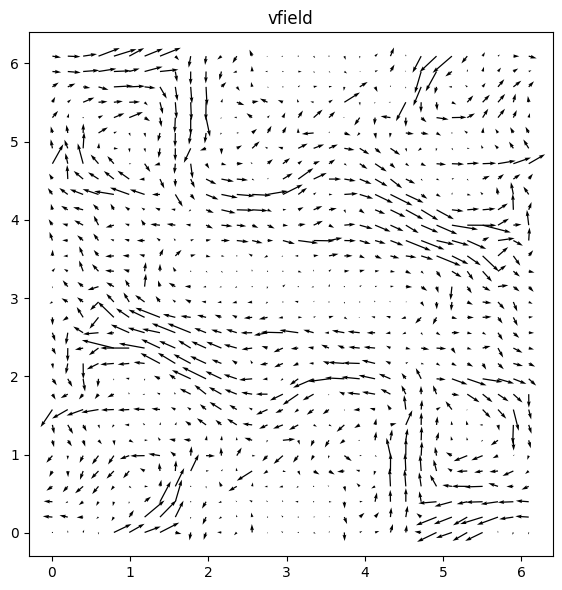

In [21]:
animate_vfield(_vx1_list,_vx2_list,save_dir=os.path.join(save_dir,'vfield.mp4'),title='vfield',
               XY=(X,Y),
               intv=512//32,
              )

/home/yangelaxue/clusters/lib/python3.12/site-packages/powerbox/tools.py:261: FutureWarning: In the future, bins will be generated by default up to the smallest length over any dimension, instead of the largest magnitude for the box.Set bins_upto_boxlen to silence this warning.
  bins = _getbins(bins, coord_mags, log_bins, bins_upto_boxlen=bins_upto_boxlen)


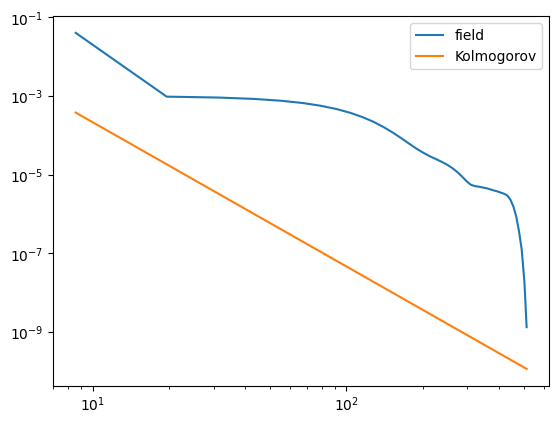

In [22]:
p_k_field, bins_field = pbox.get_power(rho_list[0], 1)

fig, ax = plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

line, = ax.plot(bins_field, p_k_field,label='field')
ax.plot(bins_field, bins_field**(-11/3), label="Kolmogorov")

ax.legend()

def animate_power_spectrum(i):
    p_k_field_line = pbox.get_power(rho_list[i], 1)[0]
    line.set_ydata(p_k_field_line)  # update the data.
    return line,


ani = animation.FuncAnimation(fig, animate_power_spectrum, interval=len(rho_list),save_count=len(rho_list))

# To save the animation, use e.g.
#
ani.save(os.path.join(save_dir,'power spectrum w viscosity.mp4'),dpi=150)
    
# plt.plot(bins_field, p_k_field)



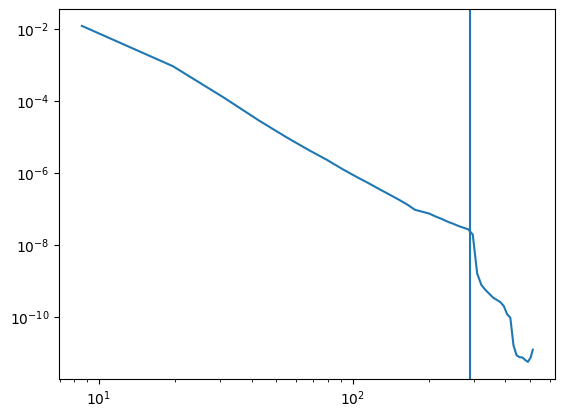

In [32]:
p_k_field_line = pbox.get_power(rho_list[100], 1)[0]

plt.plot(bins_field, p_k_field_line)
plt.axvline(290)

plt.yscale('log')
plt.xscale('log')

In [33]:
L=2*np.pi/290

L, 4/96

(0.021666156231653747, 0.041666666666666664)

(0.020943951023931952, 0.041666666666666664)

In [ ]:
plt.pcolormesh(X, Y, rho, cmap='magma')
plt.colorbar()

plt.gca().set_aspect(1)

In [ ]:
kvec, Bx1_fft = modal_spectrum(Bx1, lenn=[2*np.pi,2*np.pi])

In [ ]:
Bx1_fft.shape

In [ ]:
plt.pcolormesh(kvec[0], kvec[1], Bx1_fft.real, cmap='magma')
plt.colorbar()

plt.gca().set_aspect(1)

In [ ]:
kvec

In [14]:
from utils import reynolds
from utils.differentiation_utils import gradient_FT, gradient_discrete

In [43]:
ux1 = reynolds.get_fluctuations(vx1_list,times)
ux2 = reynolds.get_fluctuations(vx2_list,times)

# _Ux1 = reynolds.get_timeaverage(ux1,times)
# _Ux2 = reynolds.get_timeaverage(ux2,times)
# assert np.isclose(_Ux1,np.zeros_like(_Ux1)).all()
# assert np.isclose(_Ux2,np.zeros_like(_Ux2)).all()

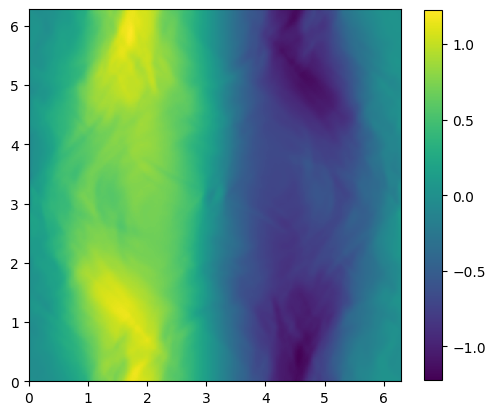

In [44]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

im = ax.pcolormesh(X,Y,ux2[0])

fig.colorbar(im,shrink=.8)

In [15]:
if X.ndim==3:
    dxdydz = ((X.max()-X.min())/X.shape[0],(Y.max()-Y.min())/Y.shape[1],(Z.max()-Z.min())/Z.shape[2])
else:
    dxdydz = ((X.max()-X.min())/X.shape[0],(Y.max()-Y.min())/Y.shape[1])

In [45]:
timeslice = 100

In [46]:
stress = reynolds.get_stress(prs_list[timeslice],0,vx1_list[timeslice],vx2_list[timeslice],dxdydz=dxdydz)

In [47]:
strain  = reynolds.get_strain(vx1_list[timeslice],vx2_list[timeslice],dxdydz=dxdydz)

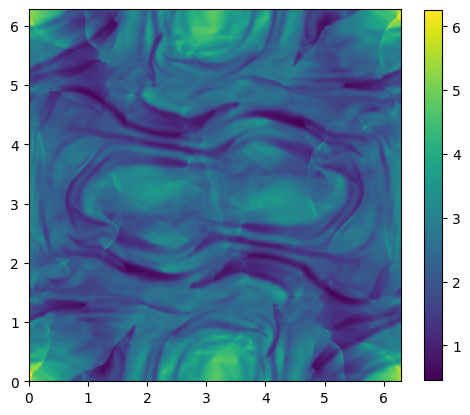

In [61]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.set_aspect("equal")

# im = ax.pcolormesh(X,Y,gradients[0][1]+gradients[1][0])
# im = ax.pcolormesh(X,Y,strain[1][0])
im = ax.pcolormesh(X,Y,prs_list[timeslice])

fig.colorbar(im,shrink=.8)

In [51]:
gradients = []
v = [vx1_list[timeslice],vx2_list[timeslice]]
for _v in v:
    grad = gradient_FT(_v,dxdydz)
    gradients.append(grad)

In [60]:
prs

NameError: name 'prs' is not defined

In [30]:
stress

array([[[[-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         ...,
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667],
         [-1.66666667, -1.66666667, -1.66666667, ..., -1.66666667,
          -1.66666667, -1.66666667]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        